In [9]:
import os
import numpy as np
from shutil import copyfile
from keras import Input, layers, backend, Model, losses, datasets, models, metrics, optimizers, initializers
from keras.utils import Sequence
import tensorflow as tf
import matplotlib.pyplot as plt
import math

Path = "/home/ug-ml/felix-ML/VAE_000/Data/Data" #Folder containing Training Validation and Test

In [14]:
def LoadImages(Path):
    Train_Paths = []
    Validation_Paths = []
    Test_Paths = []
    Path_i = sorted(os.listdir(Path)) #Training Validation and Test
    for i in Path_i: #i training, validation and test
        Path_j = sorted(os.listdir(Path + "/" + i))
        for j in Path_j: #j is the crystal
            InputFile = Path + "/" + i + "/" + j +"/" + "Input.npy"
            OutputFile = Path + "/" + i + "/" + j +"/" + "Output.npy"
            if(i == "Training"):
                Train_Paths.append([InputFile, OutputFile])
            elif(i == "Validation"):
                Validation_Paths.append([InputFile, OutputFile])
            else:
                Test_Paths.append([InputFile, OutputFile])
    All_Paths = [Train_Paths, Validation_Paths, Test_Paths]
    
    Train_Images = np.zeros(len(Train_Paths) * 128 * 128 * 2, dtype = np.float32).reshape(len(Train_Paths), 2, 128, 128)
    Validation_Images = np.zeros(len(Validation_Paths) * 128 * 128 * 2, dtype = np.float32).reshape(len(Validation_Paths), 2, 128, 128)
    Test_Images = np.zeros(len(Test_Paths) * 128 * 128 * 2, dtype = np.float32).reshape(len(Test_Paths), 2, 128, 128)
    
    All_Images = [Train_Images, Validation_Images, Test_Images]
    for i in range(0, len(All_Paths)):
        for j in range(0, len(All_Paths[i])):
            All_Images[i][j][0] = np.load(All_Paths[i][j][0]).astype(np.float32)
            All_Images[i][j][1] = np.load(All_Paths[i][j][1]).astype(np.float32)
    return(All_Images)
    
def PairInputImages(All_Images): #Comparison done by a mean square
    #with All_Images = [Train_Images, Validation_Images, Test_Images]
    DataSetSize = [len(All_Images[0]), len(All_Images[1]), len(All_Images[2])]
    TrainValidationPairs = np.zeros(DataSetSize[0] * DataSetSize[1], dtype = np.float32).reshape(DataSetSize[0], DataSetSize[1])
    TrainTestPairs = np.zeros(DataSetSize[0] * DataSetSize[2], dtype = np.float32).reshape(DataSetSize[0], DataSetSize[2])
    
    for i in range(0, DataSetSize[0]):
        print("1: ", i)
        for j in range(0, DataSetSize[1]):
            TrainValidationPairs[i][j] = MeanSquare(All_Images[0][i][0], All_Images[1][j][0])
            
    for i in range(0, DataSetSize[0]):
        print("2: ", i)
        for j in range(0, DataSetSize[2]):
            TrainTestPairs[i][j] = MeanSquare(All_Images[0][i][0], All_Images[2][j][0])
    
    BestPairTrainValidation = np.zeros(DataSetSize[1], dtype = np.int)
    BestPairTrainTest = np.zeros(DataSetSize[2], dtype = np.int)
    
    for i in range(0, DataSetSize[1]):
        print("3: ", i)
        min_val = np.inf
        for j in range(0, DataSetSize[0]):
            if(TrainValidationPairs[j][i] < min_val):
                BestPairTrainValidation[i] = j
                min_val = TrainValidationPairs[j][i]
                
    for i in range(0, DataSetSize[2]):
        print("4: ", i)
        min_val = np.inf
        for j in range(0, DataSetSize[0]):
            if(TrainTestPairs[j][i] < min_val):
                BestPairTrainTest[i] = j
                min_val = TrainTestPairs[j][i]
    return(BestPairTrainValidation, BestPairTrainTest)


def BestPairLoss(All_Images, BestPairTrainValidation, BestPairTrainTest):
    Val_Loss_Sum = 0
    Test_Loss_Sum = 0
    for i in range(0, len(BestPairTrainValidation)):
        Val_Loss_Sum+=MeanSquareLogError(All_Images[1][i][1], All_Images[0][BestPairTrainValidation[i]][1])
        print("1: ", i)
    for i in range(0, len(BestPairTrainTest)):
        Test_Loss_Sum+=MeanSquareLogError(All_Images[2][i][1], All_Images[0][BestPairTrainTest[i]][1])
        print("2: ", i)
    Val_Loss = Val_Loss_Sum / len(BestPairTrainValidation)
    Test_Loss = Test_Loss_Sum / len(BestPairTrainTest)
    return(Val_Loss, Test_Loss)


    
def MeanSquare(Image_1, Image_2): #Shape N by N
    ms = (np.sum(np.square(Image_1 - Image_2)))
    return(ms)

#MSLE = tf.keras.losses.MeanSquaredLogarithmicError()
def MeanSquareLogError(Image_1, Image_2):
    msle = 0
    for i in range(0, len(Image_1)):
        for j in range(0, len(Image_1[i])):
            msle+=(math.log(1+Image_1[i][j]) - math.log(1+Image_2[i][j])) ** 2
    return(msle)




In [3]:
All_Images = LoadImages(Path)
print("Crystals Loaded")

Crystals Loaded


In [4]:
#Pair up the most similar input images in the training with the validation and test data
BestPairTrainValidation, BestPairTrainTest = PairInputImages(All_Images)

#ogVals = LogValues(SortedImages)

1:  0
1:  1
1:  2
1:  3
1:  4
1:  5
1:  6
1:  7
1:  8
1:  9
1:  10
1:  11
1:  12
1:  13
1:  14
1:  15
1:  16
1:  17
1:  18
1:  19
1:  20
1:  21
1:  22
1:  23
1:  24
1:  25
1:  26
1:  27
1:  28
1:  29
1:  30
1:  31
1:  32
1:  33
1:  34
1:  35
1:  36
1:  37
1:  38
1:  39
1:  40
1:  41
1:  42
1:  43
1:  44
1:  45
1:  46
1:  47
1:  48
1:  49
1:  50
1:  51
1:  52
1:  53
1:  54
1:  55
1:  56
1:  57
1:  58
1:  59
1:  60
1:  61
1:  62
1:  63
1:  64
1:  65
1:  66
1:  67
1:  68
1:  69
1:  70
1:  71
1:  72
1:  73
1:  74
1:  75
1:  76
1:  77
1:  78
1:  79
1:  80
1:  81
1:  82
1:  83
1:  84
1:  85
1:  86
1:  87
1:  88
1:  89
1:  90
1:  91
1:  92
1:  93
1:  94
1:  95
1:  96
1:  97
1:  98
1:  99
1:  100
1:  101
1:  102
1:  103
1:  104
1:  105
1:  106
1:  107
1:  108
1:  109
1:  110
1:  111
1:  112
1:  113
1:  114
1:  115
1:  116
1:  117
1:  118
1:  119
1:  120
1:  121
1:  122
1:  123
1:  124
1:  125
1:  126
1:  127
1:  128
1:  129
1:  130
1:  131
1:  132
1:  133
1:  134
1:  135
1:  136
1:  137
1:  13

1:  1035
1:  1036
1:  1037
1:  1038
1:  1039
1:  1040
1:  1041
1:  1042
1:  1043
1:  1044
1:  1045
1:  1046
1:  1047
1:  1048
1:  1049
1:  1050
1:  1051
1:  1052
1:  1053
1:  1054
1:  1055
1:  1056
1:  1057
1:  1058
1:  1059
1:  1060
1:  1061
1:  1062
1:  1063
1:  1064
1:  1065
1:  1066
1:  1067
1:  1068
1:  1069
1:  1070
1:  1071
1:  1072
1:  1073
1:  1074
1:  1075
1:  1076
1:  1077
1:  1078
1:  1079
1:  1080
1:  1081
1:  1082
1:  1083
1:  1084
1:  1085
1:  1086
1:  1087
1:  1088
1:  1089
1:  1090
1:  1091
1:  1092
1:  1093
1:  1094
1:  1095
1:  1096
1:  1097
1:  1098
1:  1099
1:  1100
1:  1101
1:  1102
1:  1103
1:  1104
1:  1105
1:  1106
1:  1107
1:  1108
1:  1109
1:  1110
1:  1111
1:  1112
1:  1113
1:  1114
1:  1115
1:  1116
1:  1117
1:  1118
1:  1119
1:  1120
1:  1121
1:  1122
1:  1123
1:  1124
1:  1125
1:  1126
1:  1127
1:  1128
1:  1129
1:  1130
1:  1131
1:  1132
1:  1133
1:  1134
1:  1135
1:  1136
1:  1137
1:  1138
1:  1139
1:  1140
1:  1141
1:  1142
1:  1143
1:  1144
1:  1145
1

1:  1947
1:  1948
1:  1949
1:  1950
1:  1951
1:  1952
1:  1953
1:  1954
1:  1955
1:  1956
1:  1957
1:  1958
1:  1959
1:  1960
1:  1961
1:  1962
1:  1963
1:  1964
1:  1965
1:  1966
1:  1967
1:  1968
1:  1969
1:  1970
1:  1971
1:  1972
1:  1973
1:  1974
1:  1975
1:  1976
1:  1977
1:  1978
1:  1979
1:  1980
1:  1981
1:  1982
1:  1983
1:  1984
1:  1985
1:  1986
1:  1987
1:  1988
1:  1989
1:  1990
1:  1991
1:  1992
1:  1993
1:  1994
1:  1995
1:  1996
1:  1997
1:  1998
1:  1999
1:  2000
1:  2001
1:  2002
1:  2003
1:  2004
1:  2005
1:  2006
1:  2007
1:  2008
1:  2009
1:  2010
1:  2011
1:  2012
1:  2013
1:  2014
1:  2015
1:  2016
1:  2017
1:  2018
1:  2019
1:  2020
1:  2021
1:  2022
1:  2023
1:  2024
1:  2025
1:  2026
1:  2027
1:  2028
1:  2029
1:  2030
1:  2031
1:  2032
1:  2033
1:  2034
1:  2035
1:  2036
1:  2037
1:  2038
1:  2039
1:  2040
1:  2041
1:  2042
1:  2043
1:  2044
1:  2045
1:  2046
1:  2047
1:  2048
1:  2049
1:  2050
1:  2051
1:  2052
1:  2053
1:  2054
1:  2055
1:  2056
1:  2057
1

1:  2862
1:  2863
1:  2864
1:  2865
1:  2866
1:  2867
1:  2868
1:  2869
1:  2870
1:  2871
1:  2872
1:  2873
1:  2874
1:  2875
1:  2876
1:  2877
1:  2878
1:  2879
1:  2880
1:  2881
1:  2882
1:  2883
1:  2884
1:  2885
1:  2886
1:  2887
1:  2888
1:  2889
1:  2890
1:  2891
1:  2892
1:  2893
1:  2894
1:  2895
1:  2896
1:  2897
1:  2898
1:  2899
1:  2900
1:  2901
1:  2902
1:  2903
1:  2904
1:  2905
1:  2906
1:  2907
1:  2908
1:  2909
1:  2910
1:  2911
1:  2912
1:  2913
1:  2914
1:  2915
1:  2916
1:  2917
1:  2918
1:  2919
1:  2920
1:  2921
1:  2922
1:  2923
1:  2924
1:  2925
1:  2926
1:  2927
1:  2928
1:  2929
1:  2930
1:  2931
1:  2932
1:  2933
1:  2934
1:  2935
1:  2936
1:  2937
1:  2938
1:  2939
1:  2940
1:  2941
1:  2942
1:  2943
1:  2944
1:  2945
1:  2946
1:  2947
1:  2948
1:  2949
1:  2950
1:  2951
1:  2952
1:  2953
1:  2954
1:  2955
1:  2956
1:  2957
1:  2958
1:  2959
1:  2960
1:  2961
1:  2962
1:  2963
1:  2964
1:  2965
1:  2966
1:  2967
1:  2968
1:  2969
1:  2970
1:  2971
1:  2972
1

1:  3779
1:  3780
1:  3781
1:  3782
1:  3783
1:  3784
1:  3785
1:  3786
1:  3787
1:  3788
1:  3789
1:  3790
1:  3791
1:  3792
1:  3793
1:  3794
1:  3795
1:  3796
1:  3797
1:  3798
1:  3799
1:  3800
1:  3801
1:  3802
1:  3803
1:  3804
1:  3805
1:  3806
1:  3807
1:  3808
1:  3809
1:  3810
1:  3811
1:  3812
1:  3813
1:  3814
1:  3815
1:  3816
1:  3817
1:  3818
1:  3819
1:  3820
1:  3821
1:  3822
1:  3823
1:  3824
1:  3825
1:  3826
1:  3827
1:  3828
1:  3829
1:  3830
1:  3831
1:  3832
1:  3833
1:  3834
1:  3835
1:  3836
1:  3837
1:  3838
1:  3839
1:  3840
1:  3841
1:  3842
1:  3843
1:  3844
1:  3845
1:  3846
1:  3847
1:  3848
1:  3849
1:  3850
1:  3851
1:  3852
1:  3853
1:  3854
1:  3855
1:  3856
1:  3857
1:  3858
1:  3859
1:  3860
1:  3861
1:  3862
1:  3863
1:  3864
1:  3865
1:  3866
1:  3867
1:  3868
1:  3869
1:  3870
1:  3871
1:  3872
1:  3873
1:  3874
1:  3875
1:  3876
1:  3877
1:  3878
1:  3879
1:  3880
1:  3881
1:  3882
1:  3883
1:  3884
1:  3885
1:  3886
1:  3887
1:  3888
1:  3889
1

1:  4694
1:  4695
1:  4696
1:  4697
1:  4698
1:  4699
1:  4700
1:  4701
1:  4702
1:  4703
1:  4704
1:  4705
1:  4706
1:  4707
1:  4708
1:  4709
1:  4710
1:  4711
1:  4712
1:  4713
1:  4714
1:  4715
1:  4716
1:  4717
1:  4718
1:  4719
1:  4720
1:  4721
1:  4722
1:  4723
1:  4724
1:  4725
1:  4726
1:  4727
1:  4728
1:  4729
1:  4730
1:  4731
1:  4732
1:  4733
1:  4734
1:  4735
1:  4736
1:  4737
1:  4738
1:  4739
1:  4740
1:  4741
1:  4742
1:  4743
1:  4744
1:  4745
1:  4746
1:  4747
1:  4748
1:  4749
1:  4750
1:  4751
1:  4752
1:  4753
1:  4754
1:  4755
1:  4756
1:  4757
1:  4758
1:  4759
1:  4760
1:  4761
1:  4762
1:  4763
1:  4764
1:  4765
1:  4766
1:  4767
1:  4768
1:  4769
1:  4770
1:  4771
1:  4772
1:  4773
1:  4774
1:  4775
1:  4776
1:  4777
1:  4778
1:  4779
1:  4780
1:  4781
1:  4782
1:  4783
1:  4784
1:  4785
1:  4786
1:  4787
1:  4788
1:  4789
1:  4790
1:  4791
1:  4792
1:  4793
1:  4794
1:  4795
1:  4796
1:  4797
1:  4798
1:  4799
1:  4800
1:  4801
1:  4802
1:  4803
1:  4804
1

1:  5608
1:  5609
1:  5610
1:  5611
1:  5612
1:  5613
1:  5614
1:  5615
1:  5616
1:  5617
1:  5618
1:  5619
1:  5620
1:  5621
1:  5622
1:  5623
1:  5624
1:  5625
1:  5626
1:  5627
1:  5628
1:  5629
1:  5630
1:  5631
1:  5632
1:  5633
1:  5634
1:  5635
1:  5636
1:  5637
1:  5638
1:  5639
1:  5640
1:  5641
1:  5642
1:  5643
1:  5644
1:  5645
1:  5646
1:  5647
1:  5648
1:  5649
1:  5650
1:  5651
1:  5652
1:  5653
1:  5654
1:  5655
1:  5656
1:  5657
1:  5658
1:  5659
1:  5660
1:  5661
1:  5662
1:  5663
1:  5664
1:  5665
1:  5666
1:  5667
1:  5668
1:  5669
1:  5670
1:  5671
1:  5672
1:  5673
1:  5674
1:  5675
1:  5676
1:  5677
1:  5678
1:  5679
1:  5680
1:  5681
1:  5682
1:  5683
1:  5684
1:  5685
1:  5686
1:  5687
1:  5688
1:  5689
1:  5690
1:  5691
1:  5692
1:  5693
1:  5694
1:  5695
1:  5696
1:  5697
1:  5698
1:  5699
1:  5700
1:  5701
1:  5702
1:  5703
1:  5704
1:  5705
1:  5706
1:  5707
1:  5708
1:  5709
1:  5710
1:  5711
1:  5712
1:  5713
1:  5714
1:  5715
1:  5716
1:  5717
1:  5718
1

2:  844
2:  845
2:  846
2:  847
2:  848
2:  849
2:  850
2:  851
2:  852
2:  853
2:  854
2:  855
2:  856
2:  857
2:  858
2:  859
2:  860
2:  861
2:  862
2:  863
2:  864
2:  865
2:  866
2:  867
2:  868
2:  869
2:  870
2:  871
2:  872
2:  873
2:  874
2:  875
2:  876
2:  877
2:  878
2:  879
2:  880
2:  881
2:  882
2:  883
2:  884
2:  885
2:  886
2:  887
2:  888
2:  889
2:  890
2:  891
2:  892
2:  893
2:  894
2:  895
2:  896
2:  897
2:  898
2:  899
2:  900
2:  901
2:  902
2:  903
2:  904
2:  905
2:  906
2:  907
2:  908
2:  909
2:  910
2:  911
2:  912
2:  913
2:  914
2:  915
2:  916
2:  917
2:  918
2:  919
2:  920
2:  921
2:  922
2:  923
2:  924
2:  925
2:  926
2:  927
2:  928
2:  929
2:  930
2:  931
2:  932
2:  933
2:  934
2:  935
2:  936
2:  937
2:  938
2:  939
2:  940
2:  941
2:  942
2:  943
2:  944
2:  945
2:  946
2:  947
2:  948
2:  949
2:  950
2:  951
2:  952
2:  953
2:  954
2:  955
2:  956
2:  957
2:  958
2:  959
2:  960
2:  961
2:  962
2:  963
2:  964
2:  965
2:  966
2:  967
2:  968


2:  1780
2:  1781
2:  1782
2:  1783
2:  1784
2:  1785
2:  1786
2:  1787
2:  1788
2:  1789
2:  1790
2:  1791
2:  1792
2:  1793
2:  1794
2:  1795
2:  1796
2:  1797
2:  1798
2:  1799
2:  1800
2:  1801
2:  1802
2:  1803
2:  1804
2:  1805
2:  1806
2:  1807
2:  1808
2:  1809
2:  1810
2:  1811
2:  1812
2:  1813
2:  1814
2:  1815
2:  1816
2:  1817
2:  1818
2:  1819
2:  1820
2:  1821
2:  1822
2:  1823
2:  1824
2:  1825
2:  1826
2:  1827
2:  1828
2:  1829
2:  1830
2:  1831
2:  1832
2:  1833
2:  1834
2:  1835
2:  1836
2:  1837
2:  1838
2:  1839
2:  1840
2:  1841
2:  1842
2:  1843
2:  1844
2:  1845
2:  1846
2:  1847
2:  1848
2:  1849
2:  1850
2:  1851
2:  1852
2:  1853
2:  1854
2:  1855
2:  1856
2:  1857
2:  1858
2:  1859
2:  1860
2:  1861
2:  1862
2:  1863
2:  1864
2:  1865
2:  1866
2:  1867
2:  1868
2:  1869
2:  1870
2:  1871
2:  1872
2:  1873
2:  1874
2:  1875
2:  1876
2:  1877
2:  1878
2:  1879
2:  1880
2:  1881
2:  1882
2:  1883
2:  1884
2:  1885
2:  1886
2:  1887
2:  1888
2:  1889
2:  1890
2

2:  2692
2:  2693
2:  2694
2:  2695
2:  2696
2:  2697
2:  2698
2:  2699
2:  2700
2:  2701
2:  2702
2:  2703
2:  2704
2:  2705
2:  2706
2:  2707
2:  2708
2:  2709
2:  2710
2:  2711
2:  2712
2:  2713
2:  2714
2:  2715
2:  2716
2:  2717
2:  2718
2:  2719
2:  2720
2:  2721
2:  2722
2:  2723
2:  2724
2:  2725
2:  2726
2:  2727
2:  2728
2:  2729
2:  2730
2:  2731
2:  2732
2:  2733
2:  2734
2:  2735
2:  2736
2:  2737
2:  2738
2:  2739
2:  2740
2:  2741
2:  2742
2:  2743
2:  2744
2:  2745
2:  2746
2:  2747
2:  2748
2:  2749
2:  2750
2:  2751
2:  2752
2:  2753
2:  2754
2:  2755
2:  2756
2:  2757
2:  2758
2:  2759
2:  2760
2:  2761
2:  2762
2:  2763
2:  2764
2:  2765
2:  2766
2:  2767
2:  2768
2:  2769
2:  2770
2:  2771
2:  2772
2:  2773
2:  2774
2:  2775
2:  2776
2:  2777
2:  2778
2:  2779
2:  2780
2:  2781
2:  2782
2:  2783
2:  2784
2:  2785
2:  2786
2:  2787
2:  2788
2:  2789
2:  2790
2:  2791
2:  2792
2:  2793
2:  2794
2:  2795
2:  2796
2:  2797
2:  2798
2:  2799
2:  2800
2:  2801
2:  2802
2

2:  3604
2:  3605
2:  3606
2:  3607
2:  3608
2:  3609
2:  3610
2:  3611
2:  3612
2:  3613
2:  3614
2:  3615
2:  3616
2:  3617
2:  3618
2:  3619
2:  3620
2:  3621
2:  3622
2:  3623
2:  3624
2:  3625
2:  3626
2:  3627
2:  3628
2:  3629
2:  3630
2:  3631
2:  3632
2:  3633
2:  3634
2:  3635
2:  3636
2:  3637
2:  3638
2:  3639
2:  3640
2:  3641
2:  3642
2:  3643
2:  3644
2:  3645
2:  3646
2:  3647
2:  3648
2:  3649
2:  3650
2:  3651
2:  3652
2:  3653
2:  3654
2:  3655
2:  3656
2:  3657
2:  3658
2:  3659
2:  3660
2:  3661
2:  3662
2:  3663
2:  3664
2:  3665
2:  3666
2:  3667
2:  3668
2:  3669
2:  3670
2:  3671
2:  3672
2:  3673
2:  3674
2:  3675
2:  3676
2:  3677
2:  3678
2:  3679
2:  3680
2:  3681
2:  3682
2:  3683
2:  3684
2:  3685
2:  3686
2:  3687
2:  3688
2:  3689
2:  3690
2:  3691
2:  3692
2:  3693
2:  3694
2:  3695
2:  3696
2:  3697
2:  3698
2:  3699
2:  3700
2:  3701
2:  3702
2:  3703
2:  3704
2:  3705
2:  3706
2:  3707
2:  3708
2:  3709
2:  3710
2:  3711
2:  3712
2:  3713
2:  3714
2

2:  4516
2:  4517
2:  4518
2:  4519
2:  4520
2:  4521
2:  4522
2:  4523
2:  4524
2:  4525
2:  4526
2:  4527
2:  4528
2:  4529
2:  4530
2:  4531
2:  4532
2:  4533
2:  4534
2:  4535
2:  4536
2:  4537
2:  4538
2:  4539
2:  4540
2:  4541
2:  4542
2:  4543
2:  4544
2:  4545
2:  4546
2:  4547
2:  4548
2:  4549
2:  4550
2:  4551
2:  4552
2:  4553
2:  4554
2:  4555
2:  4556
2:  4557
2:  4558
2:  4559
2:  4560
2:  4561
2:  4562
2:  4563
2:  4564
2:  4565
2:  4566
2:  4567
2:  4568
2:  4569
2:  4570
2:  4571
2:  4572
2:  4573
2:  4574
2:  4575
2:  4576
2:  4577
2:  4578
2:  4579
2:  4580
2:  4581
2:  4582
2:  4583
2:  4584
2:  4585
2:  4586
2:  4587
2:  4588
2:  4589
2:  4590
2:  4591
2:  4592
2:  4593
2:  4594
2:  4595
2:  4596
2:  4597
2:  4598
2:  4599
2:  4600
2:  4601
2:  4602
2:  4603
2:  4604
2:  4605
2:  4606
2:  4607
2:  4608
2:  4609
2:  4610
2:  4611
2:  4612
2:  4613
2:  4614
2:  4615
2:  4616
2:  4617
2:  4618
2:  4619
2:  4620
2:  4621
2:  4622
2:  4623
2:  4624
2:  4625
2:  4626
2

2:  5428
2:  5429
2:  5430
2:  5431
2:  5432
2:  5433
2:  5434
2:  5435
2:  5436
2:  5437
2:  5438
2:  5439
2:  5440
2:  5441
2:  5442
2:  5443
2:  5444
2:  5445
2:  5446
2:  5447
2:  5448
2:  5449
2:  5450
2:  5451
2:  5452
2:  5453
2:  5454
2:  5455
2:  5456
2:  5457
2:  5458
2:  5459
2:  5460
2:  5461
2:  5462
2:  5463
2:  5464
2:  5465
2:  5466
2:  5467
2:  5468
2:  5469
2:  5470
2:  5471
2:  5472
2:  5473
2:  5474
2:  5475
2:  5476
2:  5477
2:  5478
2:  5479
2:  5480
2:  5481
2:  5482
2:  5483
2:  5484
2:  5485
2:  5486
2:  5487
2:  5488
2:  5489
2:  5490
2:  5491
2:  5492
2:  5493
2:  5494
2:  5495
2:  5496
2:  5497
2:  5498
2:  5499
2:  5500
2:  5501
2:  5502
2:  5503
2:  5504
2:  5505
2:  5506
2:  5507
2:  5508
2:  5509
2:  5510
2:  5511
2:  5512
2:  5513
2:  5514
2:  5515
2:  5516
2:  5517
2:  5518
2:  5519
2:  5520
2:  5521
2:  5522
2:  5523
2:  5524
2:  5525
2:  5526
2:  5527
2:  5528
2:  5529
2:  5530
2:  5531
2:  5532
2:  5533
2:  5534
2:  5535
2:  5536
2:  5537
2:  5538
2

4:  29
4:  30
4:  31
4:  32
4:  33
4:  34
4:  35
4:  36
4:  37
4:  38
4:  39
4:  40
4:  41
4:  42
4:  43
4:  44
4:  45
4:  46
4:  47
4:  48
4:  49
4:  50
4:  51
4:  52
4:  53
4:  54
4:  55
4:  56
4:  57
4:  58
4:  59
4:  60
4:  61
4:  62
4:  63
4:  64
4:  65
4:  66
4:  67
4:  68
4:  69
4:  70
4:  71
4:  72
4:  73
4:  74
4:  75
4:  76
4:  77
4:  78
4:  79
4:  80
4:  81
4:  82
4:  83
4:  84
4:  85
4:  86
4:  87
4:  88
4:  89
4:  90
4:  91
4:  92
4:  93
4:  94
4:  95
4:  96
4:  97
4:  98
4:  99
4:  100
4:  101
4:  102
4:  103
4:  104
4:  105
4:  106
4:  107
4:  108
4:  109
4:  110
4:  111
4:  112
4:  113
4:  114
4:  115
4:  116
4:  117
4:  118
4:  119
4:  120
4:  121
4:  122
4:  123
4:  124
4:  125
4:  126
4:  127
4:  128
4:  129
4:  130
4:  131
4:  132
4:  133
4:  134
4:  135
4:  136
4:  137
4:  138
4:  139
4:  140
4:  141
4:  142
4:  143
4:  144
4:  145
4:  146
4:  147
4:  148
4:  149
4:  150
4:  151
4:  152
4:  153
4:  154
4:  155
4:  156
4:  157
4:  158
4:  159
4:  160
4:  161
4:  162

In [5]:
Val_Loss, Test_Loss = BestPairLoss(All_Images, BestPairTrainValidation, BestPairTrainTest)
print("Validation loss: ", Val_Loss)
print("Test loss: ", Test_Loss)

1:  0
1:  1
1:  2
1:  3
1:  4
1:  5
1:  6
1:  7
1:  8
1:  9
1:  10
1:  11
1:  12
1:  13
1:  14
1:  15
1:  16
1:  17
1:  18
1:  19
1:  20
1:  21
1:  22
1:  23
1:  24
1:  25
1:  26
1:  27
1:  28
1:  29
1:  30
1:  31
1:  32
1:  33
1:  34
1:  35
1:  36
1:  37
1:  38
1:  39
1:  40
1:  41
1:  42
1:  43
1:  44
1:  45
1:  46
1:  47
1:  48
1:  49
1:  50
1:  51
1:  52
1:  53
1:  54
1:  55
1:  56
1:  57
1:  58
1:  59
1:  60
1:  61
1:  62
1:  63
1:  64
1:  65
1:  66
1:  67
1:  68
1:  69
1:  70
1:  71
1:  72
1:  73
1:  74
1:  75
1:  76
1:  77
1:  78
1:  79
1:  80
1:  81
1:  82
1:  83
1:  84
1:  85
1:  86
1:  87
1:  88
1:  89
1:  90
1:  91
1:  92
1:  93
1:  94
1:  95
1:  96
1:  97
1:  98
1:  99
1:  100
1:  101
1:  102
1:  103
1:  104
1:  105
1:  106
1:  107
1:  108
1:  109
1:  110
1:  111
1:  112
1:  113
1:  114
1:  115
1:  116
1:  117
1:  118
1:  119
1:  120
1:  121
1:  122
1:  123
1:  124
1:  125
1:  126
1:  127
1:  128
1:  129
1:  130
1:  131
1:  132
1:  133
1:  134
1:  135
1:  136
1:  137
1:  13

8
Log loss is:  0.0
Input MS is:  0.0


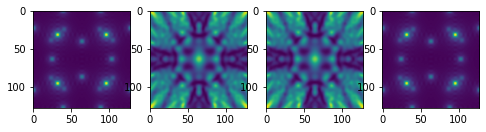

19
Log loss is:  0.0290588529772183
Input MS is:  0.031552203


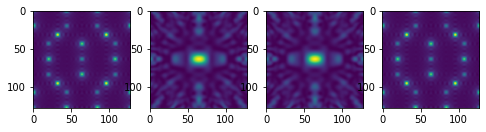

21
Log loss is:  0.0036924610100544978
Input MS is:  0.00020797024


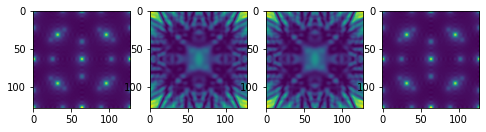

35
Log loss is:  0.14480457233103947
Input MS is:  0.011008346


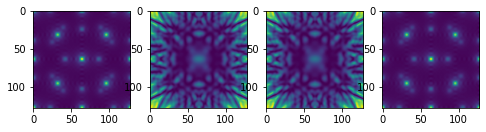

36
Log loss is:  0.019288086910454513
Input MS is:  0.00041917927


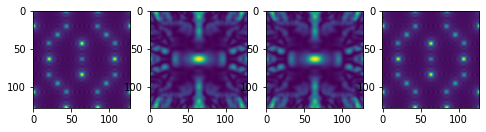

38
Log loss is:  0.13914856045396407
Input MS is:  0.38092017


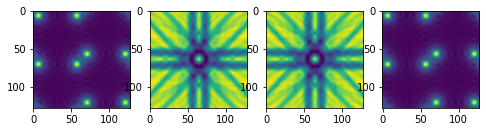

43
Log loss is:  0.05007266758128774
Input MS is:  0.08622296


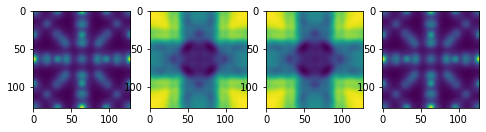

44
Log loss is:  5.650391097545765e-12
Input MS is:  0.0


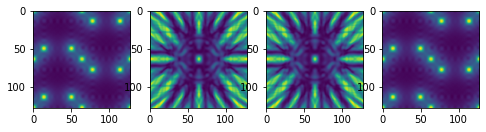

45
Log loss is:  0.013595120462316293
Input MS is:  0.00085436384


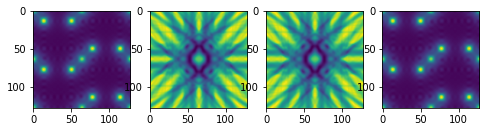

48
Log loss is:  0.3237588932606211
Input MS is:  0.080346346


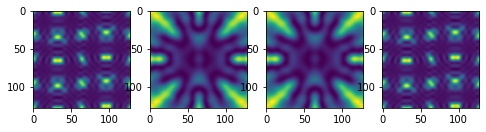

51
Log loss is:  0.005558107189422166
Input MS is:  3.6140416e-05


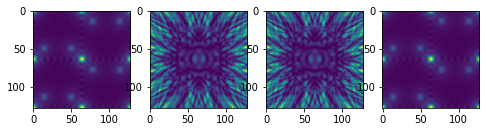

60
Log loss is:  0.012700892881351759
Input MS is:  4.142146e-05


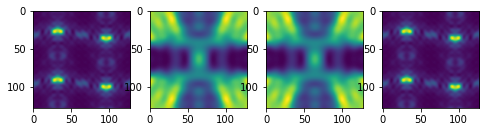

71
Log loss is:  0.29234268888282683
Input MS is:  0.15099496


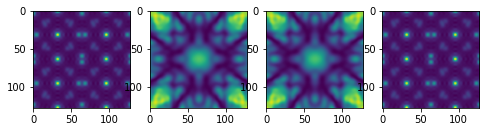

77
Log loss is:  0.2032170866622161
Input MS is:  0.001972124


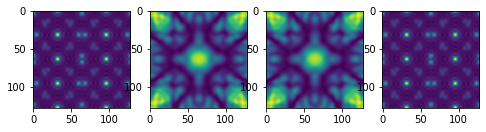

78
Log loss is:  0.0793831474730212
Input MS is:  0.005146905


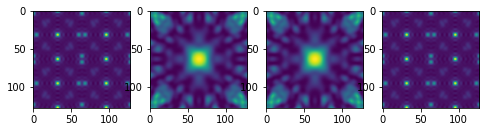

81
Log loss is:  0.11959840289782003
Input MS is:  0.0117437


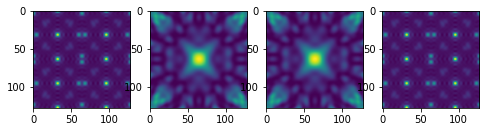

85
Log loss is:  0.881923561379333
Input MS is:  0.20081666


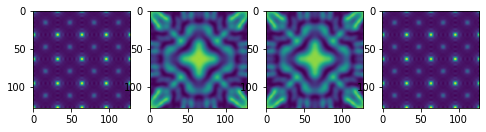

88
Log loss is:  0.5424486523007
Input MS is:  3.9401035


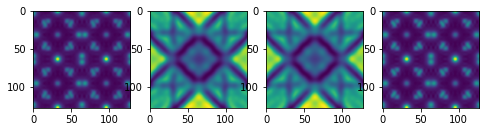

93
Log loss is:  0.25396256419662483
Input MS is:  0.00092945737


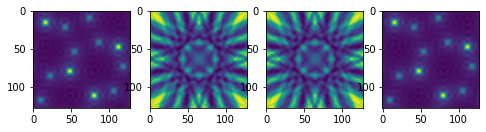

101
Log loss is:  0.606403194697929
Input MS is:  0.19155124


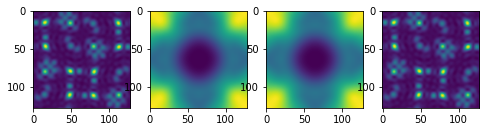

102
Log loss is:  0.3927444973734166
Input MS is:  0.24838278


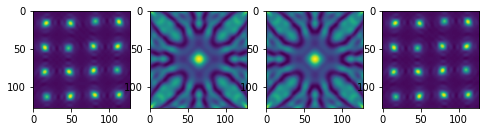

104
Log loss is:  0.015037736588476543
Input MS is:  0.014833115


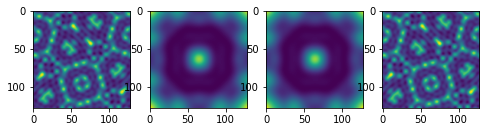

105
Log loss is:  0.0477183452968706
Input MS is:  0.07451941


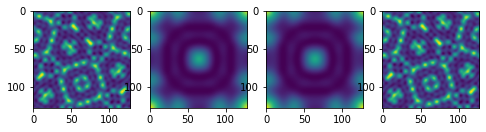

107
Log loss is:  0.012692046085934309
Input MS is:  6.9170795e-07


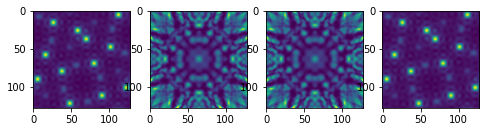

122
Log loss is:  0.007731004392836719
Input MS is:  6.7406454e-06


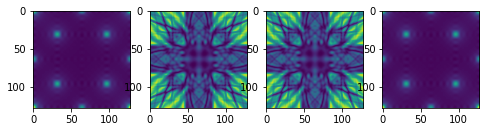

123
Log loss is:  0.0038238227709226896
Input MS is:  2.109019e-06


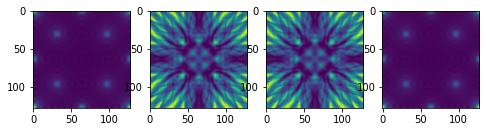

136
Log loss is:  0.0
Input MS is:  0.0


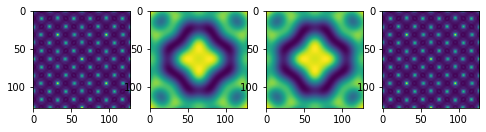

138
Log loss is:  0.7774732129593349
Input MS is:  0.0015167273


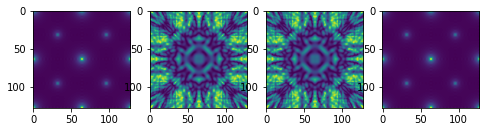

139
Log loss is:  0.013412122900192006
Input MS is:  3.8873736e-06


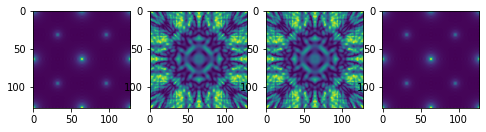

141
Log loss is:  0.34663312644623534
Input MS is:  0.08211129


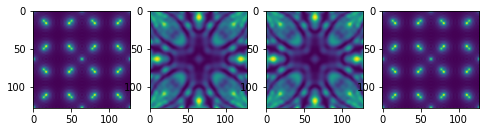

143
Log loss is:  0.439066694446272
Input MS is:  0.13734812


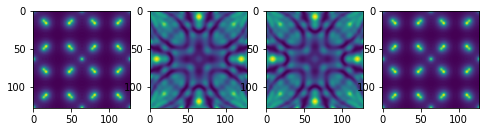

157
Log loss is:  0.22977534426757823
Input MS is:  0.13868633


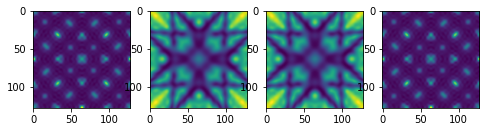

164
Log loss is:  0.06144480234270344
Input MS is:  0.010239293


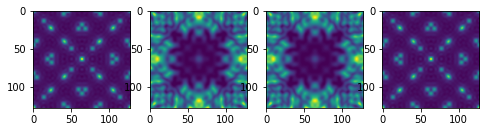

166
Log loss is:  0.20697285757189224
Input MS is:  0.03752425


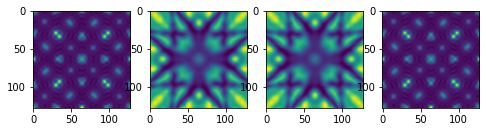

171
Log loss is:  0.12028040605385863
Input MS is:  0.016366895


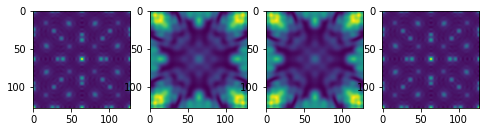

178
Log loss is:  0.19579629249908723
Input MS is:  0.09616172


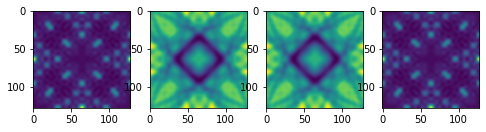

183
Log loss is:  0.015276821006328463
Input MS is:  0.014334753


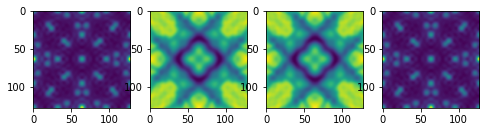

187
Log loss is:  0.1918343619999265
Input MS is:  0.21331888


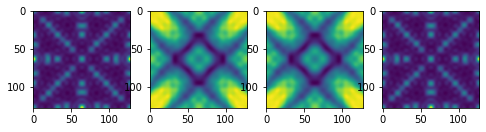

188
Log loss is:  0.10865812880432535
Input MS is:  0.096302405


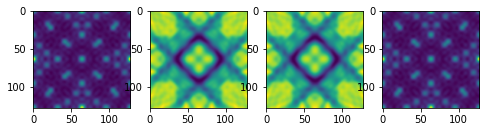

189
Log loss is:  0.7937473611248976
Input MS is:  0.5043762


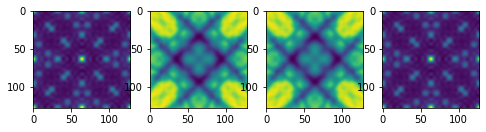

190
Log loss is:  0.4991834528685555
Input MS is:  0.15266123


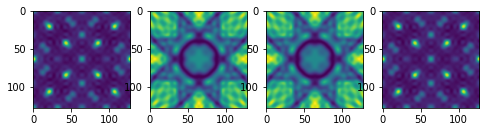

191
Log loss is:  0.0776882378038057
Input MS is:  0.033351693


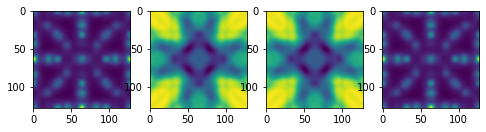

195
Log loss is:  0.23527732316870528
Input MS is:  0.42166066


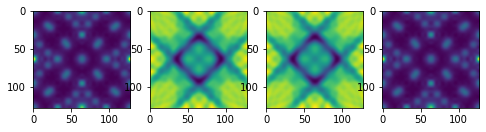

196
Log loss is:  0.2847204397808734
Input MS is:  0.07876091


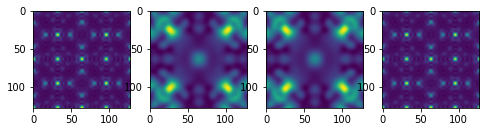

197
Log loss is:  0.05939326450719326
Input MS is:  0.17964807


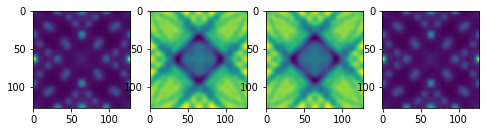

198
Log loss is:  0.1455386239835203
Input MS is:  0.00034785984


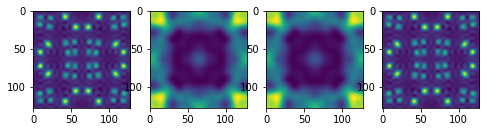

200
Log loss is:  0.27613971771476453
Input MS is:  0.005954317


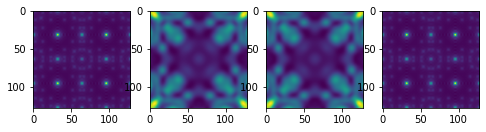

202
Log loss is:  0.12724279383154538
Input MS is:  0.0056525134


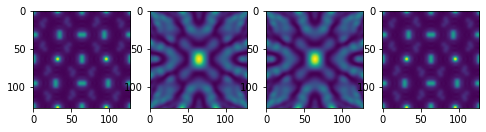

218
Log loss is:  0.038017090439662754
Input MS is:  9.288888e-06


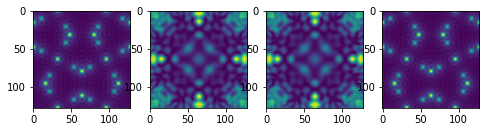

219
Log loss is:  0.04183238531623194
Input MS is:  0.2478664


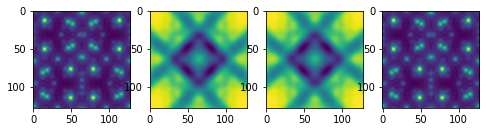

228
Log loss is:  0.2166095275737199
Input MS is:  0.059589244


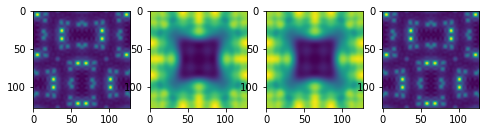

229
Log loss is:  0.03131547906254346
Input MS is:  0.006398439


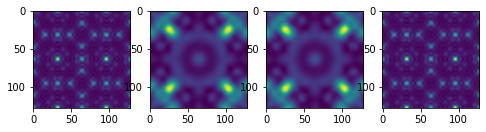

239
Log loss is:  0.22389941932768026
Input MS is:  0.00031965112


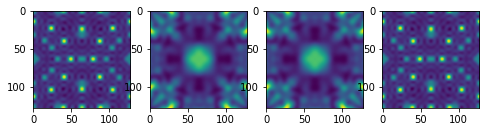

240
Log loss is:  0.0
Input MS is:  0.0


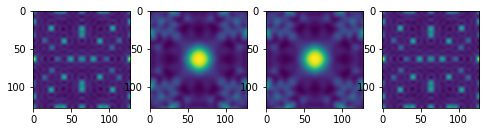

243
Log loss is:  0.1698743711996731
Input MS is:  0.00894643


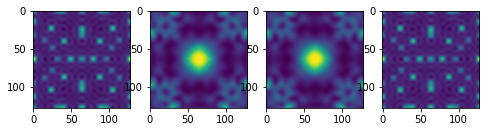

244
Log loss is:  0.012488307908933467
Input MS is:  0.00023582426


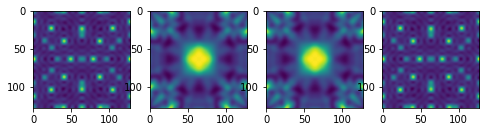

246
Log loss is:  0.9391088375624352
Input MS is:  0.008185395


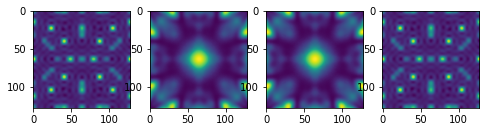

248
Log loss is:  0.05511182722489823
Input MS is:  0.00016328001


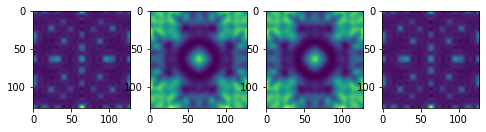

250
Log loss is:  0.006853370658250307
Input MS is:  7.55021e-05


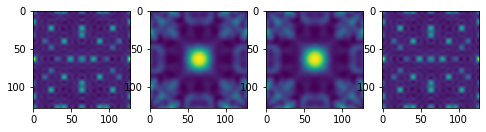

251
Log loss is:  0.018464835498002527
Input MS is:  0.00024593348


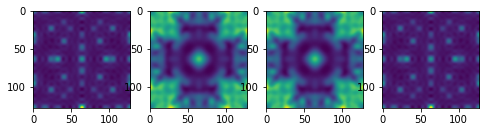

255
Log loss is:  0.11033510362468689
Input MS is:  0.002724423


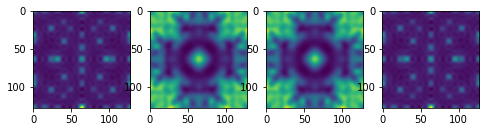

256
Log loss is:  0.15182267948402084
Input MS is:  0.0005049961


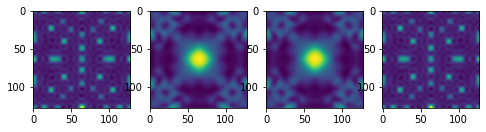

259
Log loss is:  0.8846511962788266
Input MS is:  0.11667636


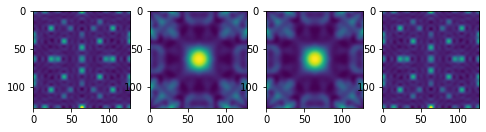

265
Log loss is:  0.06870453003763215
Input MS is:  0.016716693


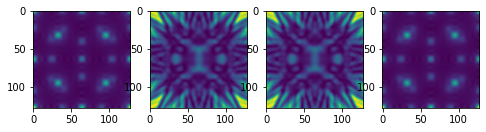

269
Log loss is:  0.23510639454467508
Input MS is:  0.057770036


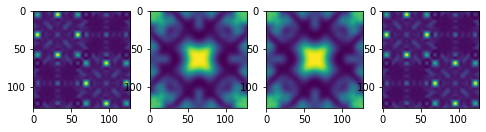

270
Log loss is:  0.07430779832919858
Input MS is:  3.5557103e-05


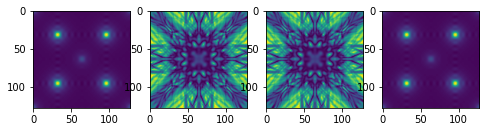

272
Log loss is:  0.0
Input MS is:  0.0


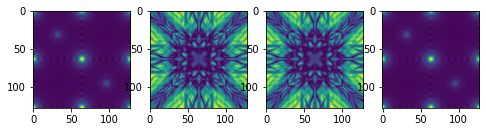

277
Log loss is:  0.16854797533613516
Input MS is:  0.017597657


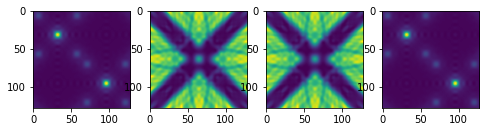

280
Log loss is:  0.5050031989860779
Input MS is:  0.012566248


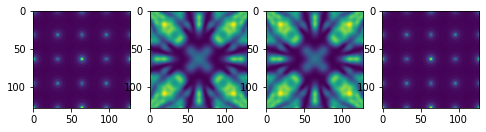

288
Log loss is:  0.06535773123753082
Input MS is:  0.0017598146


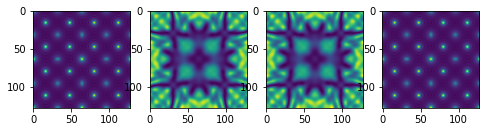

295
Log loss is:  0.049512259397320804
Input MS is:  0.00092201866


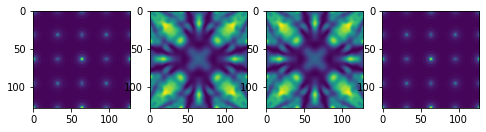

300
Log loss is:  0.09076306045500243
Input MS is:  0.03147567


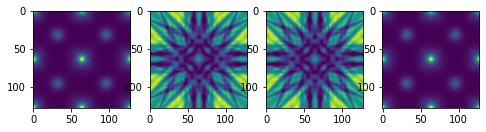

302
Log loss is:  0.7117559560605402
Input MS is:  0.043808155


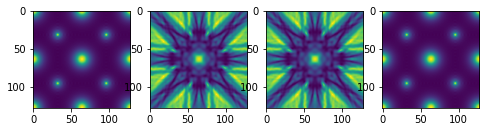

304
Log loss is:  0.6082402066357615
Input MS is:  0.0016806514


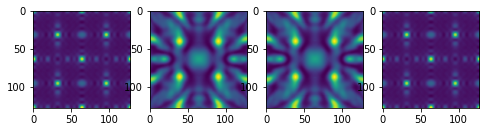

305
Log loss is:  0.290985729949934
Input MS is:  0.012776018


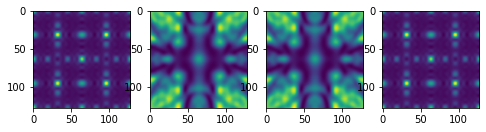

311
Log loss is:  0.505025802889428
Input MS is:  0.00010784835


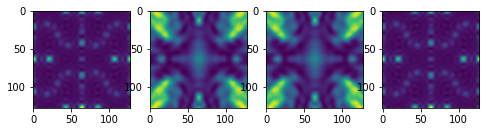

313
Log loss is:  0.040687094112607125
Input MS is:  0.0029981397


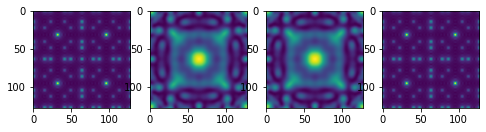

314
Log loss is:  0.051242837133728125
Input MS is:  0.0006474749


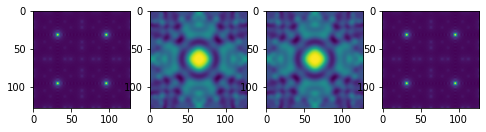

315
Log loss is:  0.08743508192080704
Input MS is:  0.0016656809


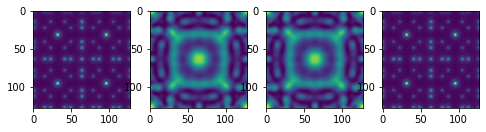

318
Log loss is:  0.06399188605654457
Input MS is:  0.0006434835


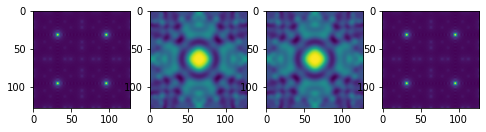

320
Log loss is:  0.7436934396920541
Input MS is:  0.19621706


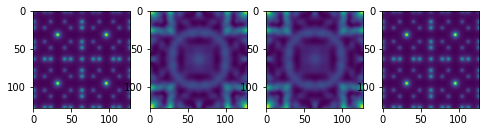

321
Log loss is:  0.35145838338337543
Input MS is:  0.044772767


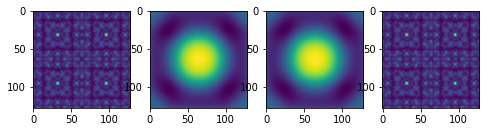

Average loss:  143.42356890047404
Number in range is  82


In [21]:
average_loss = 0
#data[0][0], data[0][1]
Rms_losses = []
reconstruction_losses = []
numberprinted = 0

for i in range(0, len(All_Images[2])):
    x = All_Images[2][i][0]
    y = All_Images[2][i][1]
    #x = np.load(data[0][i])
    #y = np.load(data[1][i])
    a = All_Images[0][BestPairTrainTest[i]][1]
    b = All_Images[0][BestPairTrainTest[i]][0]
    Input_MS = MeanSquare(x, b)
    Rms_losses.append(Input_MS)
    #print(i)
    log_loss = 0
    for j in range(0, a.shape[0]):
        for k in range(0, a.shape[1]):
            log_loss+=(math.log(1+a[j][k]) - math.log(1+y[j][k])) ** 2
    reconstruction_losses.append(log_loss)
    average_loss+=log_loss
    if log_loss < 1:
        numberprinted+=1
        print(i)
        print("Log loss is: ", log_loss)
        print("Input MS is: ", Input_MS)
        w=10
        h=10
        fig=plt.figure(figsize=(8, 8))
        columns = 4
        rows = 1
        fig.add_subplot(rows, columns, 1)
        plt.imshow(x)
        fig.add_subplot(rows, columns, 2)
        plt.imshow(y)
        fig.add_subplot(rows, columns, 3)
        plt.imshow(a)
        fig.add_subplot(rows, columns, 4)
        plt.imshow(b)
        plt.show()
print("Average loss: ", average_loss / len(All_Images[2]))
print("Number in range is ", numberprinted)

(array([18.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  0.  ,  14.85,  29.7 ,  44.55,  59.4 ,  74.25,  89.1 , 103.95,
        118.8 , 133.65, 148.5 , 163.35, 178.2 , 193.05, 207.9 , 222.75,
        237.6 , 252.45, 267.3 , 282.15, 297.  ], dtype=float32),
 <BarContainer object of 20 artists>)

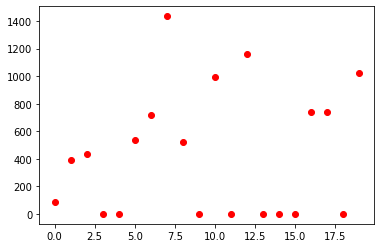

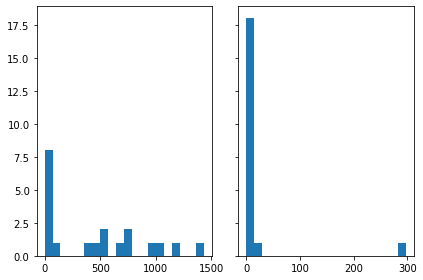

In [59]:
#plt.plot(Rms_losses, reconstruction_losses, 'o', color='black')

min_rms = min(Rms_losses)
max_rms = max(Rms_losses)
n_bins = 20

Hist_Loss = np.zeros(n_bins, dtype = np.float32)
Hist_Freq = np.zeros(n_bins, dtype = np.float32)

for i in range(0, len(Rms_losses)):
    j = math.floor((n_bins - 1) * (Rms_losses[i] - min_rms) / (max_rms - min_rms))
    Hist_Freq[j]+=1
    Hist_Loss[j]+=reconstruction_losses[i]

for i in range(0, len(Hist_Freq)):
    if(Hist_Freq[i] != 0):
        Hist_Loss[i] = Hist_Loss[i] / Hist_Freq[i]

x_range = np.arange(n_bins)

plt.plot(x_range, Hist_Loss, 'o', color='red')


fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)


axs[0].hist(Hist_Loss, bins=n_bins)
axs[1].hist(Hist_Freq, bins=n_bins)